In [2]:
from collections import Counter
import numpy as np
import math


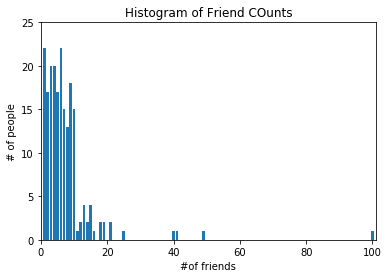

In [40]:
num_friends = num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,
                             10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,
                             6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                             2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
def user_friends_counts_histogram(plt):
    friend_counts=Counter(num_friends)
    xs = range(101)
    ys =[friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend COunts")
    plt.xlabel("#of friends")
    plt.ylabel("# of people")
    plt.show()
    
import matplotlib.pyplot as plt

#%pylab inline
user_friends_counts_histogram(plt)

In [23]:
num_points = len(num_friends)  # 94
largest_value=max(num_friends)  #100
smallest_value = min(num_friends) #1

sorted_values=sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value=sorted_values[1]
second_largest_value = sorted_values[-2]
print(second_largest_value)

49


In [24]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends)

7.333333333333333

In [25]:
#numpy version
np.mean(num_friends)

7.333333333333333

In [26]:
# 중앙값
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    
    if n%2 ==1:
        return sorted_v[midpoint]
    else:
        lo = midpoint -1
        hi = midpoint 
        return (sorted_v[lo]+ sorted_v[hi] ) / 2
    
median(num_friends)
        

6.0

In [27]:
#numpy version
np.median(num_friends)

6.0

In [28]:
def quantile(x,p):
    # x의 P분위에 속하는 값 반환
    p_index = int(p*len(x))
    return sorted(x)[p_index]

for i in range(0, 100, 25):
    print("%.2f Percentage value" % (i*0.01) , quantile(num_friends, i * 0.01))


0.00 Percentage value 1
0.25 Percentage value 3
0.50 Percentage value 6
0.75 Percentage value 9


In [29]:
np.percentile(num_friends,[ i for i in range(0,100,25)])

array([1., 3., 6., 9.])

In [30]:
def mode(x):
    # 최빈값이 하나보다 많다면 list 반환
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]
    

In [31]:
mode(num_friends)

[6, 1]

__산포도는 데이터가 얼마나 퍼져있는지 나타냄__

-0과 근접한 값이면 데이터가 거의 퍼져 있지 않다.
-큰 값이면 매우 퍼져있다.



In [32]:
# 파이썬에서 "range"는 이미 다른 것을 의미
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [33]:
def dot(v,w):
    # v_1 * w_i + ... v_n * w_n
    return sum(v_i * w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v):
    # v_i * v_i + ... v_n * v_n
    return dot(v,v)


__분산은 산포도를 측정하는 약간 더 복잡한 개념.__

- 분산의 단위는 기존 단위의 제곱.
- 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산

In [34]:
def de_mean(x):
    # x 의 모든 데이터 포인트에서 평균을 뻄.( 평균을 0으로 만들기 위해)
    x_bar = mean(x)
    return [x_i -x_bar for x_i in x]

def variance(x):
    # x 에 두개 이상의 데이터 포인트가 존재한다고 가정
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

In [35]:
variance(num_friends)

81.54351395730716

In [36]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [37]:
def interquartile_range(x):
    return quantile(x,0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

__상관관계__

-분산 : 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산.
공분산 : 두 변수가 각각의 평균에서 얼마나 떨어져 있는지 계산.

In [38]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,
                 41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,
                 37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,
                 24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,
                 35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,
                 20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,
                 32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
                 29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,
                 9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

covariance(num_friends, daily_minutes)

22.425435139573064

In [39]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x >0 and stdev_y>0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0   #편차가 존재하지 않는다면 상관관계는 0
    
correlation(num_friends,daily_minutes)

0.24736957366478218

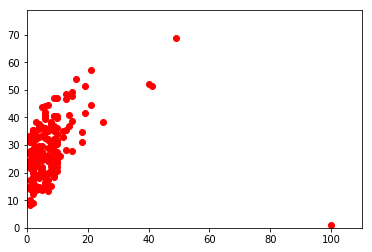

In [41]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0,max(num_friends)+10,0,max(daily_minutes) +10 ])
plt.show()

In [44]:
outlier = num_friends.index(100)
num_friends_good =[x
                  for i, x in enumerate(num_friends)
                  if i != outlier ]
daily_minutes_good = [x
                     for i, x in enumerate(daily_minutes)
                     if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

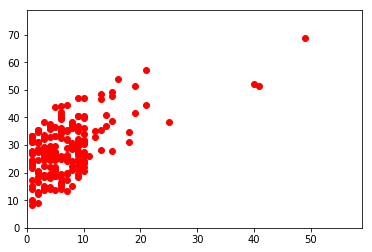

In [46]:
plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0,max(num_friends_good)+10,0,max(daily_minutes_good) +10 ])
plt.show()